| Question No. | Question |
| :--: | :-- |
| 1 | What is aliasing?  |
| 2 | What is garbage collection?  |
| 3 | What is mutability and why is it dangerous in certain scenarios? |
| 4 | What is cloning? |
| 5 | Differentiate between deep and shallow copies |
| 6 | How nested lists are stored in memory? |
| 7 | How strings are stored in memory |
| 8 | Why tuples take less memory than lists? |
| 9 | How set index position is decided? |
| 10 | Why mutable types are not allowed in sets/dicts |

# Aliasing

while a program is executing all data get loads into RAM.

Ram is a register that has 2 parts. One stores the address and second stores the value. Address gets stored in hexadecimal value and content gets stored in form of binary pattern.

for ex:  4 in ram stored as (0100)

0x100 -> 0

0x101 -> 1

0x102 -> 0

0x103 -> 0

when we declare a=4 then python considers a as a name and a will point to the memory address where binary pattern of 4 is stored (a will point to 0x100).

In [ ]:
a = 4

In [ ]:
id(a)

11126784

In [ ]:
id(4)

11126784

In [ ]:
hex(11126784) # real memory address

'0xa9c800'

In [ ]:
a = 4  # aliasing reduces memory wastage
b = a  # if we assign a value of variable to another variable then both variable will point to same memory address. This is known as aliasing.

In [ ]:
print(id(a))
print(id(b))

11126784
11126784


In [ ]:
c = b

In [ ]:
print(id(c))

11126784


In [ ]:
del a  # deletion of a varible does not delete the stored value instead it delete the reference pointer.

In [ ]:
a

NameError: ignored

In [ ]:
print(b)

4


In [ ]:
del b
print(c)

4


# Garbage Collection

When something is present in memory and no reference variable is using it. Then it is a memory wastage.

garbage collection is a internal python program that remove the unreference contents from the memory periodically.

Garbage collector performs this work itself but program cannot control this procedure.

In [ ]:
a = 'DSMP 2022-23'
b = a
c = b

In [ ]:
import sys
sys.getrefcount('DSMP 2022-23') # no of variable pointing to this value

3

# Mutability

The ability of a datatype to be change on its memory level is called mutability.

Mutable datatype

1) list

2) set

3) dictionary

Mutable datatype

1) int

2) float

3) String

4) boolean

5) complex

6) tuple


In [ ]:
L = [1,2,3]
print(id(L))

L.append(4)
print(L)
print(id(L))

139652074757168
[1, 2, 3, 4]
139652074757168


In [ ]:
T = (1,2,3)
print(id(T))

T = T + (4,)

print(T)
print(id(T))

139652076050304
(1, 2, 3, 4)
139652075362160


In [ ]:
# risky scenerio
a = [1,2,3]
b = a

b.append(4)
print(b)

[1, 2, 3, 4]


In [ ]:
print(a)

[1, 2, 3, 4]


In [1]:
# risky scenerio
def func(data):
  data.append(4)

a = [1,2,3]
func(a)  # global variable gets changed inside a function
print(a)

[1, 2, 3, 4]


In [3]:
# prevention
def func(data):
  data=data+(4,)

a = (1,2,3)
func(a)
print(a)

(1, 2, 3)


# Cloning

In [2]:
def func(data):
  data.append(4)

a = [1,2,3]
func(a[:])
print(a)

[1, 2, 3]


In [ ]:
a = [1,2,3]
# cloning
b = a[:]

In [ ]:
id(a)

139652074408688

In [ ]:
id(b)

139652074409728

In [ ]:
b.append(4)
b

[1, 2, 3, 4]

In [ ]:
a

[1, 2, 3]

In [ ]:
a = {'name':'nitish','age':33}
# aliasing (not prefer)->cloning (prefer)
b = a.copy()

b['gender'] = 'male'

print(b)
print(a)

{'name': 'nitish', 'age': 33, 'gender': 'male'}
{'name': 'nitish', 'age': 33}


# Deep Copy / Shallow copy

In [ ]:
a = [1,2,3]
# shallow
b = a.copy()

b.append(4)

print(a)
print(b)

[1, 2, 3]
[1, 2, 3, 4]


In [4]:
# Problem in shallow copy
a = [1,2,3,[4,5]]
b=a.copy()  # copy function works well in 1-d list but gives incorrect result in 2-d list
a[-1][0]=100
print(a)
print(b)

[1, 2, 3, [100, 5]]
[1, 2, 3, [100, 5]]


In [ ]:
# because the inner content of 2-d list will have same memory address
print(id(a[-1]))
print(id(b[-1]))

139652074560480
139652074560480


The prevention of this is deep copy

In [5]:
import copy

a = [1,2,3,[4,5]]
b = copy.deepcopy(a)
a[-1][0]=100
print(a)
print(b)

[1, 2, 3, [100, 5]]
[1, 2, 3, [4, 5]]


In [6]:
print(id(a[-1]))
print(id(b[-1]))

135627640237952
135627640241600


In [7]:
b[-1][0] = 400
print(a)
print(b)

[1, 2, 3, [100, 5]]
[1, 2, 3, [400, 5]]


# How nested list gets stored in memory?

- How 1-d list stored in memory?

Python list is a referential array (it stores items anywhere in memory and store their memory address in a list and that list itself has a address)

The advantage of using this approach is that we can store different kinds of datatype in a list.

- How 2-d list stored in memory?

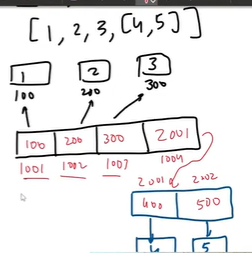

Here, we store the 1,2,3,4,5 randomly anywhere in memory. Then store the address of 1,2,3 in the list which itself contains its address. The address of inner list(4,5) gets stored in a separate list in the memory that itself contains its address.

Finally the address of this small list gets stored in the main list.

# How strings are stored in memory
Python list is a referential array and dynamic array(whenever list gets full it double the size of list and copy all item in newly created list).

Python String are referential arrays but not the dynamic array.

We stores character of string into multiple memory location and store their address into a list.

In [ ]:
s = 'hello'

id(s)

139652297075120

In [ ]:
id(s[0])

139652626357424

In [ ]:
id('h')

139652626357424

# Why tuples take less memory than lists?

Tuple is a static array and list is a dynamic array. Thatswhy list takes more memory as it double the array when it gets filled.

Quesion 9,10 --> next week